<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Well-documented, Demonstration Python Workflows 

### Bayesian Linear Regression with Metropolis-Hastings Monte Carlo Markov Chain

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This is a tutorial for / demonstration of **Bayesian Linear Regression with Metropolis-Hastings Markov Chain Monte Carlo**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84)
* [Ridge Regression](https://youtu.be/pMGO40yXZ5Y?si=ygJAheyX-v2BmSiR)
* [Bayesian Probability](https://www.youtube.com/watch?v=Ppwfr8H177M&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=6)
* [Bayesian Linear Regression](https://youtu.be/LzZ5b3wdZQk?si=DkhYrgmDXzrPFQyr)
* [Naive Bayes Classifier](https://youtu.be/BDvyLrH3cLI?si=D6boOpoVpyo-6TqK)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Bayesian Linear Regression

Bayesian machine learning methods apply probability to make predictions with an intrinsic uncertainty model. In addition, the Bayesian methods integrate the concept of Bayesian updating, a prior model updated with a likelihood model from data to calculate a posterior model. 

There are additional complexities with model training due to working with these probabilities, represented by continuous probability density functions. Due to the resulting high complexity, we can't solve for the model parameters directly, instead we must apply a sampling method such as Markov Chain Monte Carlo (MCMC) simulation.

This is a simple, very accessible demonstration of Bayesian linear regression with McMC Metropolis-Hastings sampling. My students struggled with these concepts so I challenged myself to built a workflow from scratch with all details explained clearly. Let's explain the critical prerequisites, starting with Bayesian updating.

#### Bayesian Updating

The Bayesian approach for probabilities is based on a degree of belief (expert experience) in an event updated as new information is available

* this approach to probability is powerful and can be applied to solve problems that we cannot be solved with the frequentist approach to probability

Bayesian updating is represented by Bayes' Theorem,

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

where $P(A)$ is the prior, $P(B|A)$ is the likelihood, $P(B)$ is the evidence term that is responsible for probability closure, and $P(A|B)$ is the posterior.

#### Bayesian Linear Regression

The frequentist formulation of the linear regression model is: 

$$
y = b_1 \times x + b_0 + \sigma
$$

where $x$ is the predictor feature, $b_1$ is the slope parameter, $b_0$ is the intercept parameter and $\sigma$ is the error or noise. There is an analytical form for the ordinary least squares solution to fit the available data while minimizing the L2 norm of the data error vector.

For the Bayesian formulation of linear regression is we pose the model as a prediction of the distribution of the response, $Y$, now a random variable:

$$
Y \sim N(\beta^{T}X, \sigma^{2} I)
$$

We estimate the model parameter distributions through Bayesian updating for infering the model parameters from a prior and likelihood from training data.

$$
p(\beta | y, X) = \frac{p(y,X| \beta) p(\beta)}{p(y,X)}
$$

In general for continuous features we are not able to directly calculate the posterior and we must use a sampling method, such as Markov chain Monte Carlo (McMC) to sample the posterior.

Here's a McMC Metropolis Hastings workflow and more details.

#### Bayesian Linear Regression with the Metropolis-Hastings Sampler

Here's the basic steps of the Metropolis-Hastings MCMC Sampler: 

For $\ell = 1, \ldots, L$:

1. Assign random values for the the initial sample of model parameters, $\beta(\ell = 1) = b_1(\ell = 1)$, $b_0(\ell = 1)$ and $\sigma^2(\ell = 1)$. 
2. Propose new model parameters based on a proposal function, $\beta^{\prime} = b_1$, $b_0$ and $\sigma^2$. 
3. Calculate probability of acceptance of the new proposal, as the ratio of the posterior probability of the new model parameters given the data to the previous model parameters given the data multiplied by the probability of the old step given the new step divided by the probability of the new step given the old. 

$$
P(\beta \rightarrow \beta^{\prime}) = min\left(\frac{p(\beta^{\prime}|y,X) }{ p(\beta | y,X)} \cdot \frac{p(\beta^{\prime}|\beta) }{ p(\beta | \beta^{\prime})},1\right)
$$

4. Apply Monte Carlo simulation to conditionally accept the proposal, if accepted, $\ell = \ell + 1$, and sample $\beta(\ell) = \beta^{\prime}$
5. Go to step 2.

Let's talk about this system. First the left hand side:

$$
\frac{p(\beta^{\prime}|y,X) }{ p(\beta | y,X)}
$$

We are calculating the ratio of the posterior probability (likelihood times prior) of the model parameters given the data and prior model for proposed sample over the current sample. 

* As you will see below it is quite practical to calculate this ratio.
* If the proposed sampled is more likely than the current sample, we will have a value greater than 1.0, it will truncate to 1.0 and we accept the proposed sample.
* If the proposed sample is less likely than the current sample, we will have a value less than 1.0, then we will use Monte Carlo sampling to randomly choice the proposed sample with this probability of acceptance.

This proceedure allows us to walk through the model parameter space and sample the parameters with the current rates, after the burn-in chain.

Now, what about this part of the equation?

$$
\frac{p(\beta^{\prime}|\beta) }{ p(\beta | \beta^{\prime})}
$$

There is a problem with this procedure if we use asymmetric probability distributions for the model parameters! 

* E.g. for example, if we use a positively skewed distribution (e.g., log normal) then we are more likely to step to larger values due to this distribution, and not due to the prior nor the likelihood.

* This term removes this bias, so that we have fair samples!

You will see below that we remove this issue by assuming symmetric model parameter distributions, even though many use  na assymetric gamma distribution for sigma, given it cannot have negative values.

* My goal is the simplest possible demonstration.

#### Our Simplified Demonstration Metropolis Sampling

Let's further specify this workflow for our simple demonstration. 

1. I have assumed a Gaussian, symmetric distribution for all model parameters as a result this relationship holds for all possible model parameter, current and proposed.

$$
\frac{p(\beta^{\prime}|\beta) }{ p(\beta | \beta^{\prime})} = 1.0
$$

    So we now have this simplified probability of proposal acceptance, note this is know as Metropolis Sampling.
    
$$
P(\beta \rightarrow \beta^{\prime}) = min \left( \frac{p(\beta^{\prime}|y,X) }{ p(\beta | y,X)},1 \right) 
$$

2. Now, let's substitute our Bayesian formulation for our Bayesian linear regression model.

$$
p(\beta^{\prime} | y, X) = \frac{p(y,X| \beta^{\prime}) p(\beta^{\prime})}{p(y,X)} \quad \text{      and        } \quad p(\beta | y, X) = \frac{p(y,X| \beta) p(\beta)}{p(y,X)}
$$

    If we substitute these into our probability of acceptance above we get this.


$$
P(\beta \rightarrow \beta^{\prime}) = min \left( \frac{p(\beta^{\prime}|y,X) }{ p(\beta | y,X)},1 \right) = min \left( \frac{ \left( \frac{p(y,X| \beta_{new}) p(\beta_{new}) } {p(y,X)} \right) }{ \left( \frac{ p(y,X| \beta) p(\beta)}{p(y,X)} \right) },1 \right)
$$

    Note that the evidence terms cancel out.

$$
P(\beta \rightarrow \beta^{\prime}) = min \left( \frac{ p(y,X| \beta_{new}) p(\beta_{new}) }{ p(y,X| \beta) p(\beta)},1 \right)
$$

    Since we are working with a likelihood ratio, we can work with densities instead of probabilities.

$$
P(\beta \rightarrow \beta^{\prime}) = min \left( \frac{ f(y,X| \beta_{new}) f(\beta_{new}) }{ f(y,X| \beta) f(\beta) } ,1 \right)
$$

3. Finally for improved solution stability we can calculate the natural log ratio:

$$
ln(P(\beta \rightarrow \beta^{\prime})) = min \left( ln \left[ \frac{ f(y,X| \beta_{new}) f(\beta_{new}) }{ f(y,X| \beta) f(\beta) } \right],0 \right) = min \left( \left[ln(f(y,X| \beta_{new})) + ln(f(\beta_{new})) \right] - \left[ ln(f(y,X| \beta)) + ln(f(\beta)) \right],0 \right)
$$

4. We calculate probability of proposal acceptance, as exponentiation of the above. 

5. How do we calculate the likelihood density? If we assume independence between all of the data we can take the product sum of the probabilities (densities) of all the response values given the predictor and model parameter sample! Given, the Gaussian assumption for the response feature, we can calculate the densities for each data from the Gaussian PDF.

$$
f_{y,X | \beta}(y) \sim N [ b_1 \cdot X + b_0, \sigma ]
$$

    and under the assumption of indepedence we can take the produce sum over all training data.

$$
f(y,X| \beta) = \prod_{\alpha = 1}^{n} f_{y,X | \beta}(y_{\alpha})
$$

Note, this workflow was developed with assistance from Fortunato Nucera's Medium Article [Mastering Bayesian Linear Regression from Scratch: A Metropolis-Hastings Implementation in Python](https://medium.com/@tinonucera/bayesian-linear-regression-from-scratch-a-metropolis-hastings-implementation-63526857f191). I highly recommend this accessible description and demonstration. Thank you, Fortunato.

#### Load the required libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
supress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as stats                                   # statistical methods
import pandas as pd                                           # DataFrames
import pandas.plotting as pd_plot
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.patches import Rectangle                      # build a custom legend
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn.linear_model import LinearRegression             # frequentist model for comparison
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if supress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

The following functions include:
    
* **next_proposal** - propose a next model parameters from previous previous model parameters, this is the proposal method, parameterized by step standarrd deviation and Gaussian distribution.

* **likelihood_density** - calculate the product of all the densities for all the data given the model parameters. Since we are working with the log densities, we sum over all the data.

* **prior_density** - calculate the product of the densities for all the model parameters given the prior model. Since we are working with the log densities, we sum over all the model parameters. This is an assumption of independence.

* **add_grid** - improved grid for the plotting.

In [3]:
def next_proposal(prev_theta, step_stdev = 0.5):              # assuming a Gaussian distribution centered on previous theta and step stdev  
    out_theta = stats.multivariate_normal(mean=prev_theta,cov=np.eye(3)*step_stdev**2).rvs(1)
    return out_theta

def likelihood_density(x,y,theta):                            # likelihood - probability (density) of the data given the model
    density = np.sum(stats.norm.logpdf(y, loc=theta[0]*x+theta[1],scale=theta[2])) # assume independence, sum is product in log space
    return density

def prior_density(theta,prior):                               # prior - probability (density) of the model parameters given the prior 
    mean = np.array([prior[0,0],prior[1,0],prior[2,0]]); cov = np.zeros([3,3]); cov[0,0] = prior[0,1]; cov[1,1] = prior[1,1]; cov[2,2] = prior[2,1]
    prior_out = stats.multivariate_normal.logpdf(theta,mean=mean,cov=cov,allow_singular=True)
    return prior_out

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [7]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Build a Synthetic Dataset with Known Truth Linear Regression Model Parameters

Let's build a simple dataset with known linear regression model parameters, $b_1$ is the slope parameter, $b_0$ is the intercept parameter and $\sigma$ is the error or noise.

* we buld the data based on these parameters, and then we train a linear regression model and show that we get the correct slope and intercept model parameters.

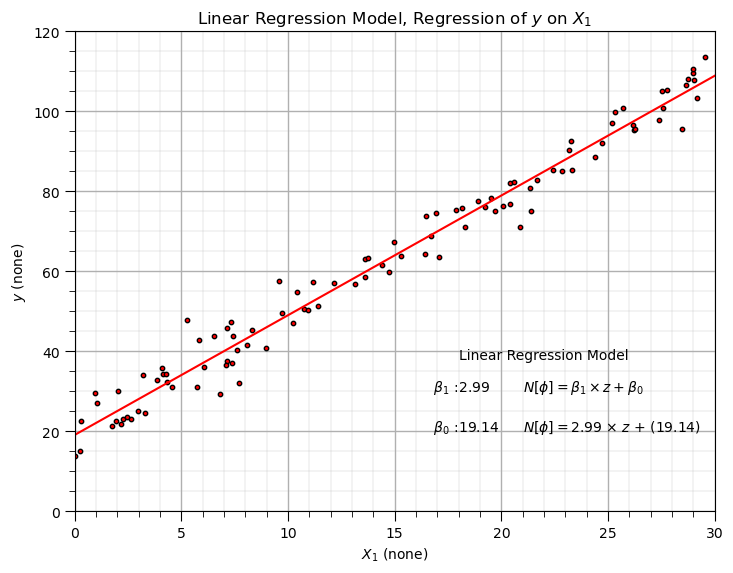

In [17]:
np.random.seed(seed = seed)                                   # set random number seed

data_b1 = 3; data_b0 = 20; data_sigma = 5; n = 100            # set data model parameters

X = np.random.rand(n)*30                                      # random x values
y = data_b1*X+data_b0 + np.random.normal(loc=0.0,scale=data_sigma,size=n) # y as a linear function of x + random noise 

Xname = [r'$X_1$']; yname = [r'$y$']                          # specify the predictor features (x2) and response feature (x1)
Xmin = 0.0; Xmax = 30; ymin = 0.0; ymax = 120                 # set minumums and maximums for visualization  
Xunit = ['none']; yunit = ['none'] 
Xlabelunit = Xname[0] + ' (' + Xunit[0] + ')'
ylabelunit = yname[0] + ' (' + yunit[0] + ')'

xhat = np.linspace(Xmin,Xmax,100)                             # set of x values to predict and visualize the model
linear_model = LinearRegression().fit(X.reshape(-1, 1),y)     # instantiate and train the frequentist linear regression model
yhat = linear_model.predict(xhat.reshape(-1, 1))              # make predictions for model plotting

slope = linear_model.coef_[0]
intercept = linear_model.intercept_

plt.subplot(111)                                              # plot the data and model
plt.scatter(X, y,c='red',s=10,edgecolor='black')
plt.plot(xhat,yhat,c='red'); add_grid()
plt.title('Linear Regression Model, Regression of ' + yname[0] + ' on ' + Xname[0])
plt.xlabel(Xlabelunit); plt.ylabel(ylabelunit)
add_grid(); plt.xlim([Xmin,Xmax]); plt.ylim([ymin,ymax])
plt.annotate('Linear Regression Model',[18.0,38])
plt.annotate(r'    $\beta_1$ :' + str(round(slope,2)),[16.0,30])
plt.annotate(r'    $\beta_0$ :' + str(round(intercept,2)),[16.0,20])
plt.annotate(r'$N[\phi] = \beta_1 \times z + \beta_0$',[21.0,30])
plt.annotate(r'$N[\phi] = $' + str(round(slope,2)) + r' $\times$ $z$ + (' + str(round(intercept,2)) + ')',[21.0,20])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

The linear regression model parameters are quite close to the coefficients used to make the synthetic data. Now let's train an Bayesian linear regression model with MCMC.

#### Bayesian Linear Regression

It all begins with a prior model, for that we assume a reasonable prior model.

##### Assume the Prior Model

We assume a multivariate Gaussian distribution for the slope and intercept parameters, $f_{b_1,b_0,\sigma}(b_1,b_0,\sigma)$ with indepedence between $b_1$, $b_0$, and $\sigma$.

* For a naive prior assume a very large standard deviation.
We will work in log probability and log density to improve stability of the system. 

* We want to avoid product sums of a many values near zero as the the probabilities will disappear due to computer floating point precision. 
* In log space, we can add calculate probabilities of independent events by summing (instead of multiplication) these negative values 

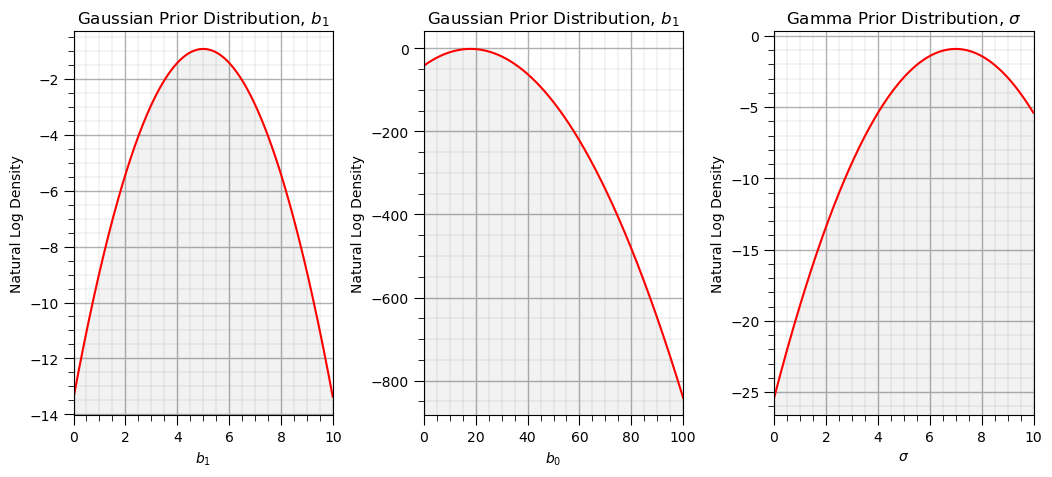

In [20]:
prior = np.zeros([3,2])                                       # prior distributions
prior[0,:] = [5.0,1.0]                                        # Gaussian prior model for slope, mean and standard deviation
prior[1,:] = [18.0,2.0]                                       # Gaussian prior model for intercept, mean and standard deviation
prior[2,:] = [7.0,1.0]                                        # Gaussian prior model for sigma, k (shape) and phi (scale), recall mean = k x phi, var = k x phi^2 

plt.subplot(131)                                              # slope prior distribution
plt.plot(np.arange(0,10,0.01),stats.norm.logpdf(np.arange(0,10,0.01),loc=prior[0,0],scale=prior[0,1]),c='red'); ylim = plt.gca().get_ylim() 
plt.fill_between(np.arange(0,10,0.01),np.full(1000,-1.0e20),stats.norm.logpdf(np.arange(0,10,0.01),loc=prior[0,0],scale=prior[0,1]),color='black',alpha=0.05,zorder=1)
plt.xlabel(r'$b_1$'); plt.ylabel('Natural Log Density'); plt.title("Gaussian Prior Distribution, $b_1$"); add_grid(); plt.xlim([0,10]); plt.ylim(ylim)

plt.subplot(132)                                              # intercept prior distribution
plt.plot(np.arange(0,100,0.01),stats.norm.logpdf(np.arange(0,100,0.01),loc=prior[1,0],scale=prior[1,1]),c='red'); ylim = plt.gca().get_ylim() 
plt.fill_between(np.arange(0,100,0.01),np.full(10000,-1.0e20),stats.norm.logpdf(np.arange(0,100,0.01),loc=prior[1,0],scale=prior[1,1]),color='black',alpha=0.05,zorder=1)
plt.xlabel(r'$b_0$'); plt.ylabel('Natural Log Density'); plt.title("Gaussian Prior Distribution, $b_1$"); add_grid(); plt.xlim([0,100]); plt.ylim(ylim)

plt.subplot(133)                                              # noise prior distribution
plt.plot(np.arange(0,10,0.01),stats.norm.logpdf(np.arange(0,10,0.01),loc=prior[2,0],scale=prior[2,1]),c='red'); ylim = plt.gca().get_ylim() 
plt.fill_between(np.arange(0,10,0.01),np.full(1000,-1.0e20),stats.norm.logpdf(np.arange(0,10,0.01),loc=prior[2,0],scale=prior[2,1]),color='black',alpha=0.05,zorder=1)
plt.xlabel(r'$\sigma$'); plt.ylabel('Natural Log Density'); plt.title("Gamma Prior Distribution, $\sigma$"); add_grid(); plt.xlim([0,10]); plt.ylim(ylim)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.8, wspace=0.35, hspace=0.5); plt.show()

##### Bayesian Linear Regression with MCMC Metropolis-Hastings 

The Bayesian linear regression with MCMC Metropolis-Hastings workflow.

1. assign an random initial set of model parameters
2. apply a proposal rule to assign a new set of model parameters given the previous set of model paramters
3. calculate the ratio of the likelihood of the new model parameters over the previous model parameters given the data
4. conditionally accept the proposal based on this ratio, i.e., if proposal is more like accept it, if less likely with a probability based on the ratio.
5. goto to 2.

In [25]:
np.random.seed(seed = seed)
step_stdev = 0.2

thetas = np.random.rand(3).reshape(1,-1)                      # seed a random first step
accepted = 0

n = 10000                                                     # number of attempts, include accepted and rejected

for i in range(n):
    theta_new = next_proposal(thetas[-1,:],step_stdev=step_stdev) # next proposal
    
    log_like_new = likelihood_density(X,y,theta_new)          # new and prior likelihoods, log of density
    log_like = likelihood_density(X,y,thetas[-1,:])
        
    log_prior_new = prior_density(theta_new,prior)            # new and prior prior, log of density
    log_prior = prior_density(thetas[-1,:],prior)
    
    likelihood_prior_proposal_ratio = np.exp((log_like_new + log_prior_new) - (log_like + log_prior)) # calculate log ratio

    if likelihood_prior_proposal_ratio > np.random.rand(1):   # conditionally accept by likelihood ratio
        thetas = np.vstack((thetas,theta_new)); accepted += 1

print('Accepted ' + str(accepted) + ' samples of ' + str(n) + ' attempts')

df = pd.DataFrame(np.vstack([thetas[:,0],thetas[:,1],thetas[:,2]]).T, columns= ['Slope','Intercept','Sigma'])

Accepted 1603 samples of 10000 attempts


##### Visualize the Results

Let's visualize the McMC Metropolis sample chain for each of the model parameters.

* Note the burn-in and equalibrium chains.

* Compare the slope and intercept model parameters to the frequentiest, linear regression solution, based only on the ordinary least squares solution, minimizing the L2 norm of the error vector over all sample data.

* Compare the noise parameter to the noise added to the synthetic data.

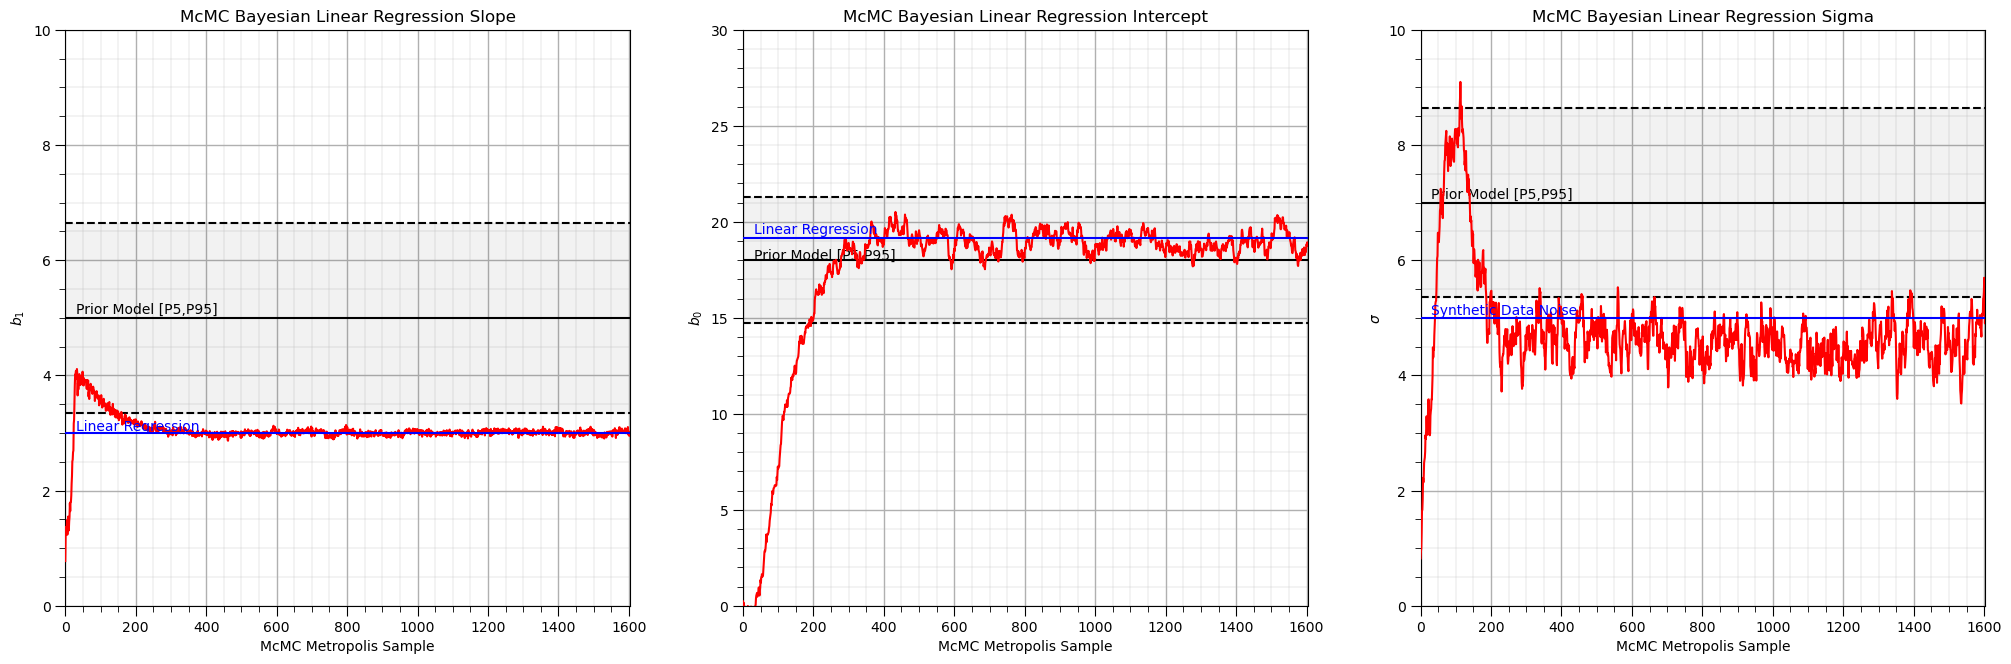

In [28]:
alpha = 0.1                                                   # alpha level for displayed confidence intervals              

plt.subplot(131)                                              # plot slope, b_1, samples
plt.plot(np.arange(0,accepted+1,1),thetas[:,0],c='red',zorder=100) 
plt.xlabel('McMC Metropolis Sample'); plt.ylabel(r'$b_1$'); plt.title("McMC Bayesian Linear Regression Slope"); add_grid()
plt.plot([0,accepted],[linear_model.coef_[0],linear_model.coef_[0]],c='blue',zorder=200)
plt.annotate('Linear Regression',[30,linear_model.coef_[0]+0.05],color='blue',zorder=200)
plt.plot([0,accepted],[prior[0,0],prior[0,0]],c='black',zorder=10)
plt.annotate('Prior Model [P' + str((int(alpha/2*100))) + ',P' + str((int((1.0-alpha/2)*100))) + ']',[30,prior[0,0]+0.07])
lower = stats.norm.ppf(alpha/2.0,loc=prior[0,0],scale=prior[0,1])
plt.plot([0,accepted],[lower,lower],c='black',ls='--',zorder=10)
upper = stats.norm.ppf(1-alpha/2.0,loc=prior[0,0],scale=prior[0,1])
plt.plot([0,accepted],[upper,upper],c='black',ls='--',zorder=10)
plt.fill_between([0,accepted],[lower,lower],[upper,upper],color='black',alpha=0.05,zorder=1)
plt.xlim([0,accepted]); plt.ylim([0,10])

plt.subplot(132)                                              # plot intercept, b_0, samples
plt.plot(np.arange(0,accepted+1,1),thetas[:,1],c='red',zorder=100) 
plt.xlabel('McMC Metropolis Sample'); plt.ylabel(r'$b_0$'); plt.title("McMC Bayesian Linear Regression Intercept"); add_grid()
plt.plot([0,accepted],[linear_model.intercept_,linear_model.intercept_],c='blue',zorder=200)
plt.annotate('Linear Regression',[30,linear_model.intercept_+0.25],color='blue',zorder=200)
plt.plot([0,accepted],[prior[1,0],prior[1,0]],c='black',zorder=10)
plt.annotate('Prior Model [P' + str((int(alpha/2*100))) + ',P' + str((int((1.0-alpha/2)*100))) + ']',[30,prior[1,0]+0.07])
lower = stats.norm.ppf(alpha/2.0,loc=prior[1,0],scale=prior[1,1])
plt.plot([0,accepted],[lower,lower],c='black',ls='--',zorder=10)
upper = stats.norm.ppf(1-alpha/2.0,loc=prior[1,0],scale=prior[1,1])
plt.plot([0,accepted],[upper,upper],c='black',ls='--',zorder=10)
plt.fill_between([0,accepted],[lower,lower],[upper,upper],color='black',alpha=0.05,zorder=1)
plt.xlim([0,accepted]); plt.ylim([0,30])

plt.subplot(133)                                              # plot noise, sigma, samples
plt.plot(np.arange(0,accepted+1,1),thetas[:,2],c='red',zorder=100) 
plt.xlabel('McMC Metropolis Sample'); plt.ylabel(r'$\sigma$'); plt.title("McMC Bayesian Linear Regression Sigma"); add_grid()
plt.plot([0,accepted],[data_sigma,data_sigma],color='blue',zorder=200)
plt.annotate('Synthetic Data Noise',[30,data_sigma+0.06],color='blue',zorder=200)
plt.plot([0,accepted],[prior[2,0],prior[2,0]],c='black',zorder=10)
plt.annotate('Prior Model [P' + str((int(alpha/2*100))) + ',P' + str((int((1.0-alpha/2)*100))) + ']',[30,prior[2,0]+0.07])
lower = stats.norm.ppf(alpha/2.0,loc=prior[2,0],scale=prior[2,1])
plt.plot([0,accepted],[lower,lower],c='black',ls='--',zorder=10)
upper = stats.norm.ppf(1-alpha/2.0,loc=prior[2,0],scale=prior[2,1])
plt.plot([0,accepted],[upper,upper],c='black',ls='--',zorder=10)
plt.fill_between([0,accepted],[lower,lower],[upper,upper],color='black',alpha=0.05,zorder=1)
plt.xlim([0,accepted]); plt.ylim([0,10])

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.5); plt.show()

##### Visualize the Chain in the Model Parameter Space

Set the burn-in chain as the accepted sample at the end of the burn in chain and observed the McMC sampling.

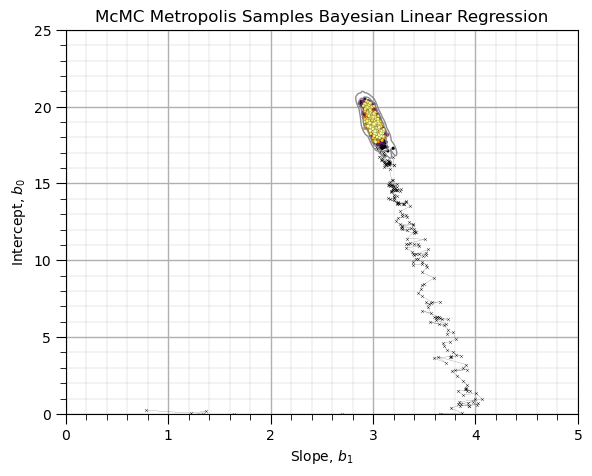

In [31]:
burn_chain = 250
plt.scatter(thetas[:burn_chain,0],thetas[:burn_chain,1],s=5,marker = 'x',c='black',alpha=0.8,linewidth=0.3,cmap=plt.cm.inferno,zorder=10)
plt.scatter(thetas[burn_chain:,0],thetas[burn_chain:,1],s=5,c=np.arange(burn_chain,accepted+1,1),alpha=1.0,edgecolor='black',linewidth=0.1,cmap=plt.cm.inferno,zorder=10)
sns.kdeplot(data=df[burn_chain:],x='Slope',y='Intercept',color='grey',linewidths=1.00,alpha=0.9,levels=np.logspace(-4,-0,3),zorder=100)
plt.plot(thetas[:burn_chain,0],thetas[:burn_chain,1],color='black',linewidth=0.1,zorder=1)
add_grid(); plt.xlabel('Slope, $b_1$'); plt.ylabel('Intercept, $b_0$'); plt.title('McMC Metropolis Samples Bayesian Linear Regression') 
plt.xlim([0,5]); plt.ylim([0,25])
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.8, top=0.8, wspace=0.2, hspace=0.5); plt.show()

#### Comments

This was a demonstration of Bayesian Linear Regression with MCMC Metropolis-Hastings Sampling.

I have many other demonstrations on data analytics and machine learning, e.g. on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig) | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  